## 1. Import Library

In [1]:
from fastai.vision.all import *

## 2. Data

In [2]:
untar_data('https://s3.amazonaws.com/fast-ai-imageclas/oxford-iiit-pet.tgz')

Path('/root/.fastai/data/oxford-iiit-pet')

> `fastai`의 인스턴스. `tar.gz`, `tgz`파일을 가져오고, 압축을 해제한다.

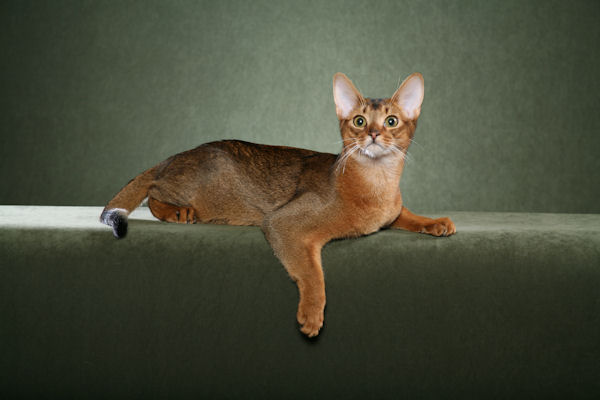

In [4]:
PILImage.create("/root/.fastai/data/oxford-iiit-pet/images/Abyssinian_1.jpg")  ## Python Image Library

In [6]:
img_paths = get_image_files("/root/.fastai/data/oxford-iiit-pet/images")  ## 디렉토리에 있는 모든 이미지 파일들의 디렉토리를 가져온다.
img_paths[0]

Path('/root/.fastai/data/oxford-iiit-pet/images/Sphynx_14.jpg')

### 자료에 대한 진실...

---


> 사실 고양이는 파일명의 첫 글자가 대문자로, 강아지는 소문자로 되어있다...!

In [4]:
def label_sep(fname) :
    if fname[0].isupper() :
        return "cat"
    else :
        return "dog"

`-` 컴퓨터가 잘 이해할 수 있도록 하는 정보 묶음을 만들어보자(자, 이건 고양이고, 이건 강아지야.)

In [9]:
dls = ImageDataLoaders.from_name_func(
    path = '/root/.fastai/data/oxford-iiit-pet/images',
    fnames = img_paths,
    label_func = label_sep,
    item_tfms = Resize(224)  ## 이미지의 크기를 강제로 224*224로 변경
)

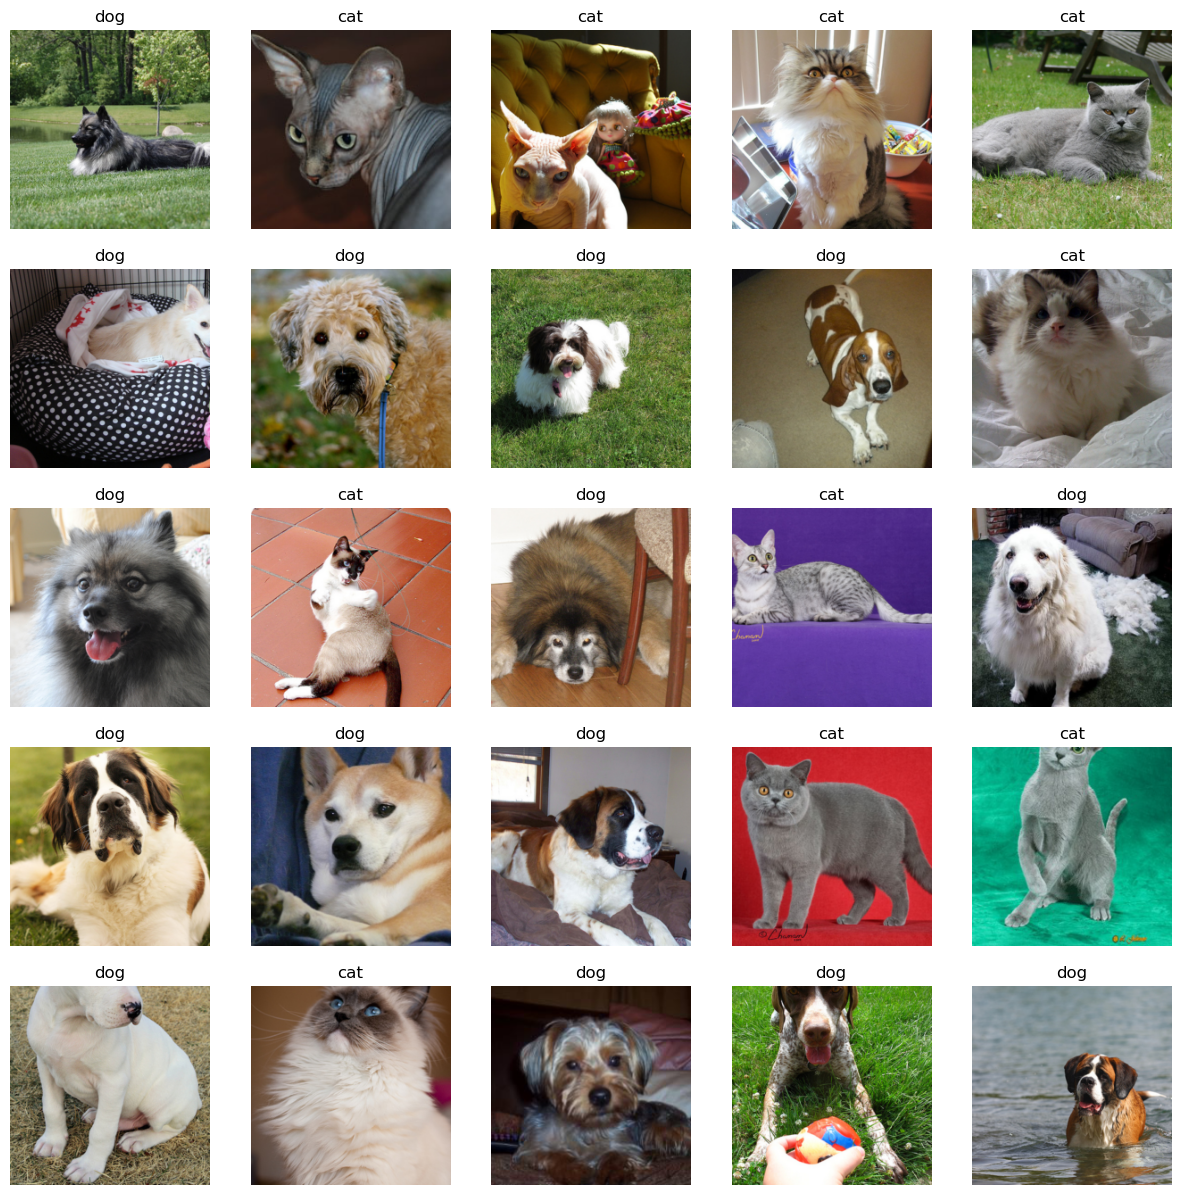

In [11]:
dls.show_batch(max_n = 25)

> dls에 정보가 잘 저장되어 있음을 확인할 수 있다.

## 3. Tuning

`-` 학습자 lrnr 생성

In [12]:
lrnr = vision_learner(
    dls = dls,
    arch = resnet34,
    metrics = accuracy
)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 113MB/s] 


In [13]:
lrnr.fine_tune(1)  ## 1회 파인튜닝

> 정확도가 아주 높다...!

`-` 기존 자료의 예측

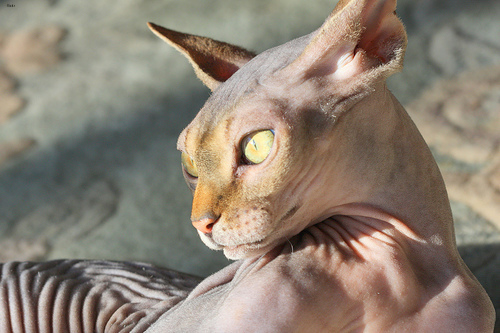

In [15]:
img0 = PILImage.create(img_paths[0])
img0  ## 고양이

In [16]:
lrnr.predict(img0)

('cat', tensor(0), tensor([9.9995e-01, 5.3339e-05]))

> 99.995%의 확률로 "이건 고양이야"라고 예측하고 있다.

`-` 그럼 틀리는 게 있긴 한가??

> 취약점 분석 모듈 : Interpretation

In [17]:
Inter = Interpretation.from_learner(lrnr)

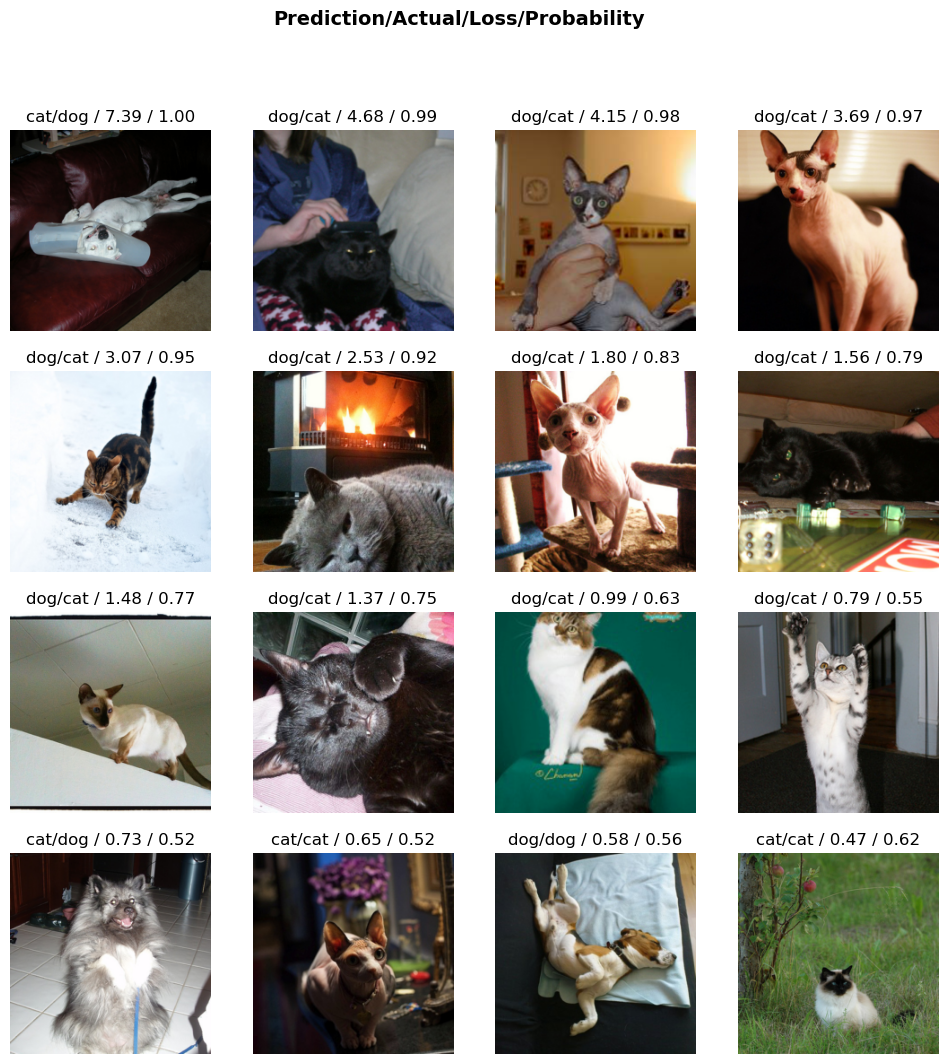

In [19]:
Inter.plot_top_losses(16)

> 맨 첫번째 그림은 Loss가 제일 높다. 왜냐면 거의 100% 고양이라고 예측했는데 강아지였기 때문. 따라서 패널티를 높게 받았다.

`-` 진짜 잘 되는 게 맞는지 다른 사진을 가져와보자.


In [20]:
import requests

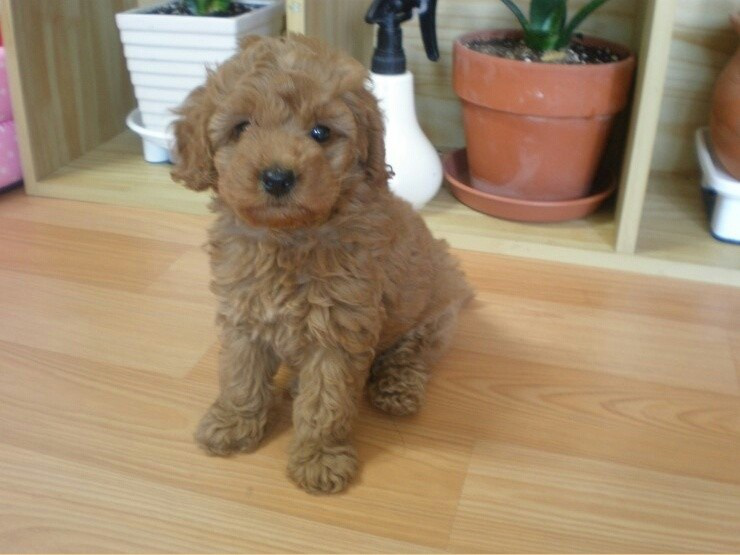

In [24]:
OnYu = PILImage.create(requests.get("https://github.com/HollyRiver/DL2024/blob/main/Data/OnYu.jpg?raw=true").content)
OnYu

In [25]:
lrnr.predict(OnYu)

('dog', tensor(1), tensor([1.3355e-06, 1.0000e+00]))

## 4. 크롤링

`-` 웹에서 데이터를 크롤링하여 간단한 인공지능을 만들어보자.

In [26]:
from duckduckgo_search import DDGS

In [ ]:
def search_images(keyword, max_images = 200) :
    with DDGS() as ddgs :
        